# Visualisations


In [35]:
import matplotlib.pyplot as plt 
import pandas as pd

In [36]:
control=[None]*2
for index,i in enumerate([10,11]):
    control[index]=pd.read_csv(f'features{i}/SR.csv',low_memory=False).iloc[:5000].apply(pd.to_numeric,errors='coerce')



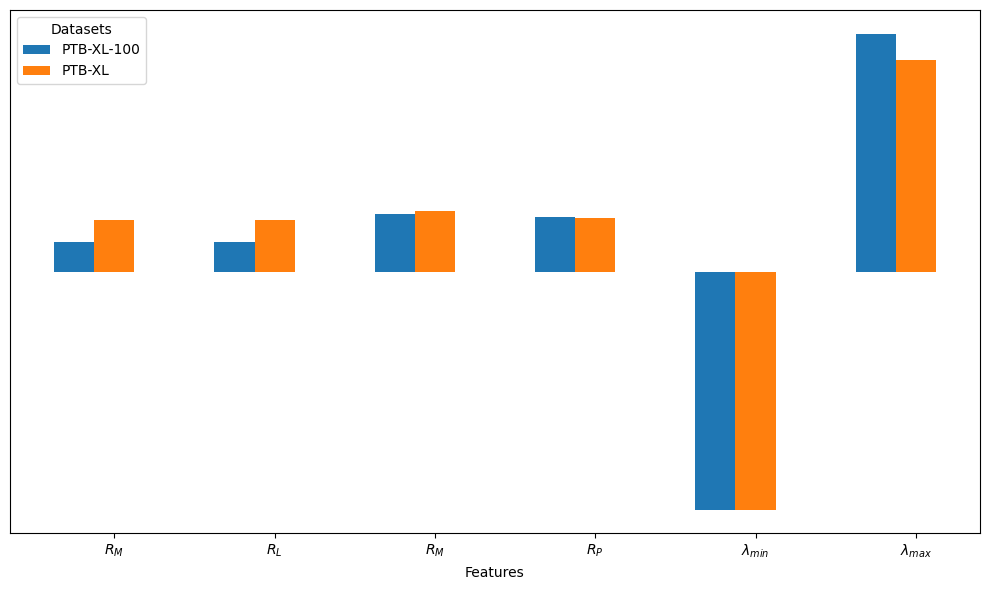

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming control is already populated as you described
# Example: control = [df1, df2, df3]

# Specify the columns you want to plot
columns_to_plot = ['R_N', 'R_L', 'R_M', 'R_P', 'Lam_min', 'Lam_max']  # Replace with your specific column names

# Compute means of the specified columns for each DataFrame
means = []
for df in control:
    means.append(df[columns_to_plot].mean())

# Convert to DataFrame for easier plotting
means_df = pd.DataFrame(means, index=['PTB-XL-100' ,'PTB-XL']).T

# Set up bar width and positions
bar_width = 0.25
x = np.arange(len(means_df))  # the label locations

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each dataset
for i in range(len(means_df.columns)):
    ax.bar(x + i * bar_width, means_df.iloc[:, i], width=bar_width, label=means_df.columns[i])

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Features')


ax.set_xticks(x + bar_width)
ax.set_yticks([])
ax.set_xticklabels( ['$R_M$', '$R_L$', '$R_M$', '$R_P$', '$λ_{min}$', '$λ_{max}$'])
ax.legend(title='Datasets')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


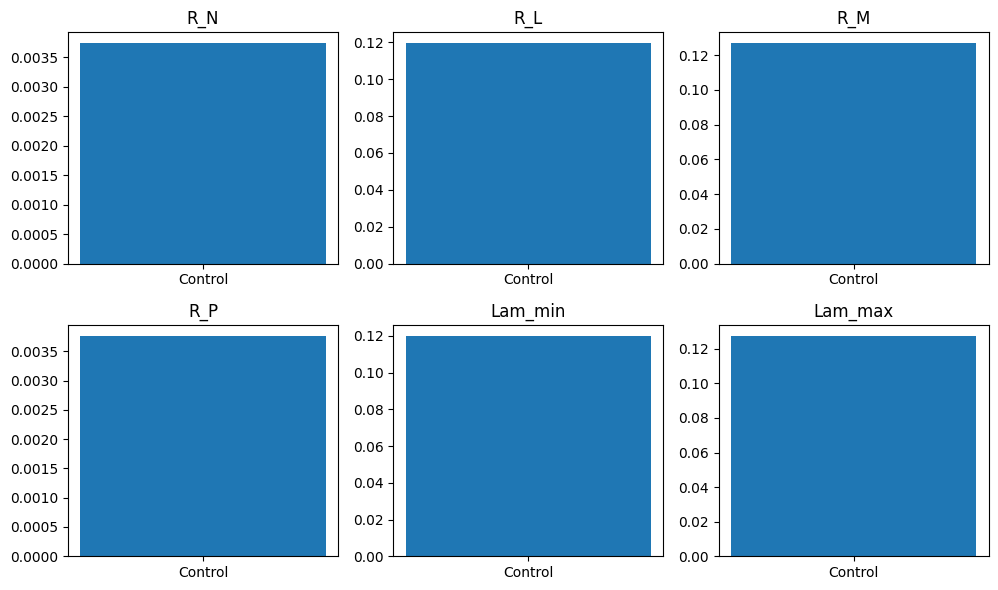

[0.003737036056463547,
 0.1195065637345991,
 0.12696923167968463,
 0.0037662843724667145,
 0.12007918758134128,
 0.12759619022323473,
 0.013445872594021382,
 0.24391289026572194,
 0.24357384190328835,
 0.031225687389731385,
 0.23536816184852252,
 0.23378356725308358,
 -1.0,
 -1.0,
 -1.0,
 -0.29627924812486445,
 0.9746409553475136,
 1.0046387097555138]

In [16]:
fields = ['R_N', 'R_L', 'R_M', 'R_P', 'Lam_min', 'Lam_max']

conditionPlot=[control[i][f].mean() for f in fields for i in range(3)]


fig, axes = plt.subplots(2, 3, figsize=(10, 6))
for i, field in enumerate(fields):
    ax = axes[i // 3, i % 3]
    ax.bar('Control',  conditionPlot[i])
    ax.set_title(field)
plt.tight_layout()


plt.show()


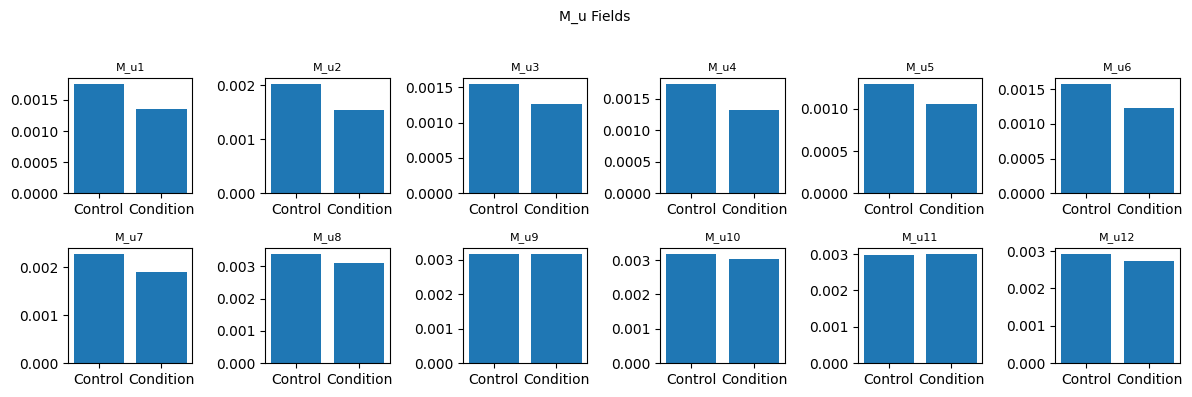

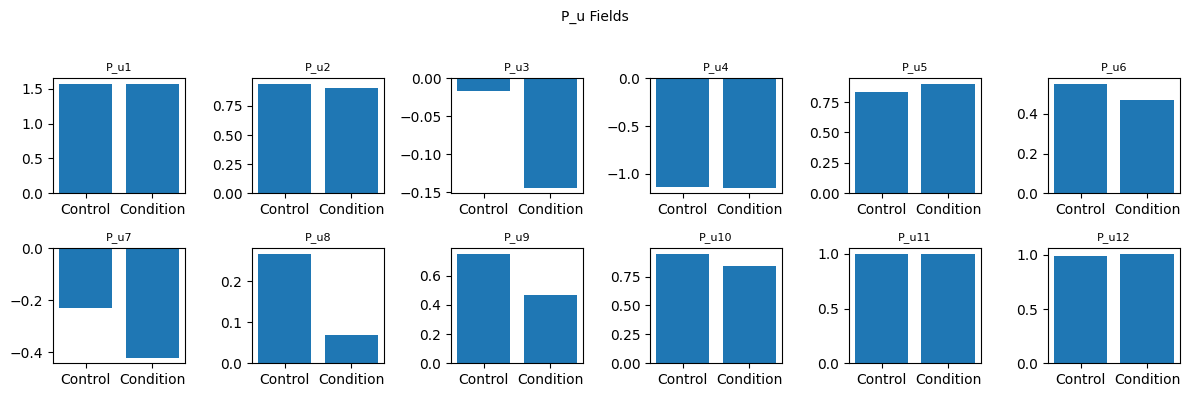

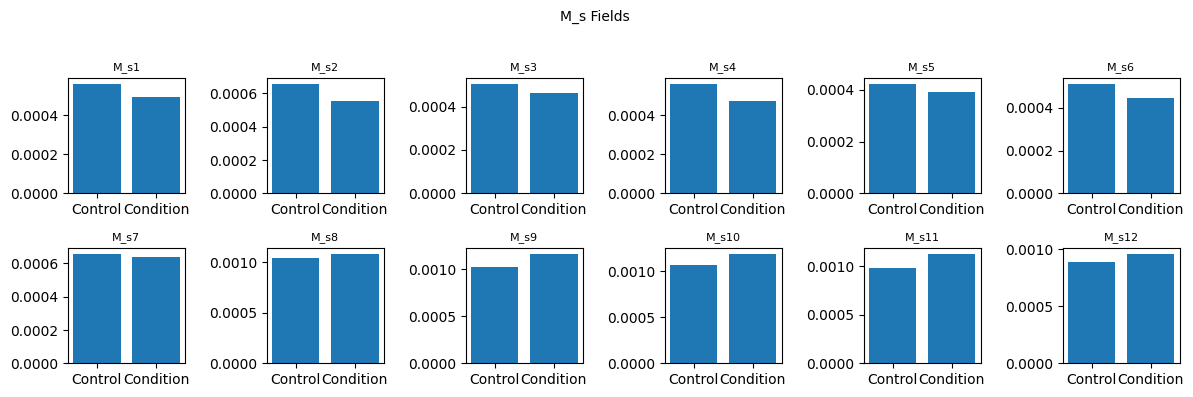

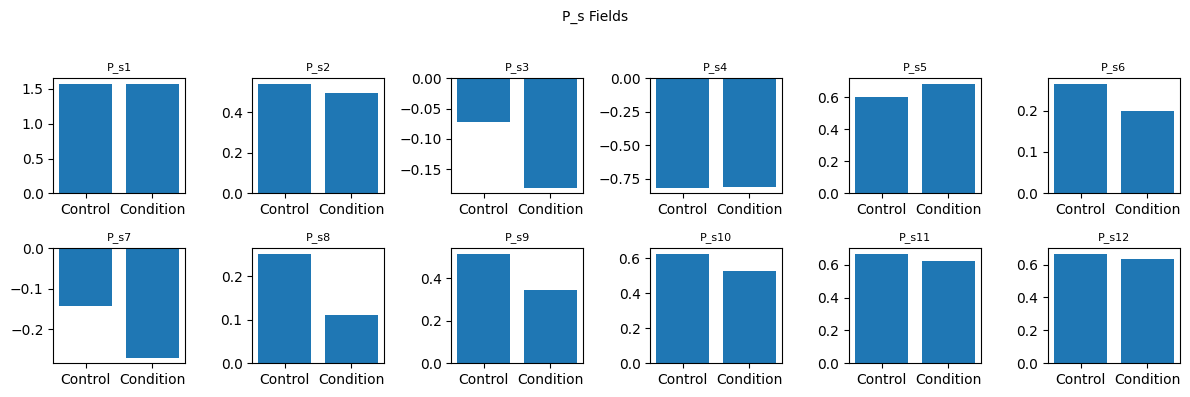

In [26]:
import matplotlib.pyplot as plt

M_u_fields = [f for f in control.columns if f.strip().startswith('M_u')]
P_u_fields = [f for f in control.columns if f.strip().startswith('P_u')]
M_s_fields = [f for f in control.columns if f.strip().startswith('M_s')]
P_s_fields = [f for f in control.columns if f.strip().startswith('P_s')]

# Create a function to plot fields in separate subplots
def plot_fields(fields, title):
    num_plots = len(fields)
    cols = 6
    rows = 2
    fig, axes = plt.subplots(rows, cols, figsize=(12, 4))  # Smaller size for compactness
    
    for i, field in enumerate(fields):
        ax = axes[i // cols, i % cols]
        ax.bar(['Control', 'Condition'], [control[field].mean(), condtion[field].mean()])
        ax.set_title(field.strip(), fontsize=8)  # Smaller title font size
    
    # Hide any unused subplots
    for j in range(num_plots, rows * cols):
        axes[j // cols, j % cols].axis('off')

    plt.suptitle(title, fontsize=10)
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
    plt.show()

# Plot each category separately
plot_fields(M_u_fields, 'M_u Fields')
plot_fields(P_u_fields, 'P_u Fields')
plot_fields(M_s_fields, 'M_s Fields')
plot_fields(P_s_fields, 'P_s Fields')
